# Diversified Portfolio Notebook

## Set Up and Execute Alapaca SDK Request

### Importing the Required Libraries

In [1]:
# Import Required Libraries

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

### Loading the .env file

In [2]:
# Make sure dotenv is loaded
load_dotenv()

True

### Alpaca API and Secret Key Variables

In [3]:
# Create Alpaca key variables to call from .env() file
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

### Create the ALpaca REST Object

In [4]:
# Create our Alpaca REST object
alpaca = tradeapi.REST(
  alpaca_api_key,
  alpaca_secret_key,
  api_version="v2"
)

alpaca

### Set the Start and End Dates

In [5]:
# Set the start and end dates for the information we want to pull from Alpaca
start_date = pd.Timestamp("2020-01-02", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-02", tz="America/New_York").isoformat()

### Set the Tickers for Alpaca to Fetch

In [6]:
# Set the list of tickers we want the Alpaca request to fetch
tickers = ["VOO", "MSFT", "AAPL", "BND", "AMT", "VUG", "TSLA", "AMZN", "EDV", "PLD"]

### Set the Timeframe for the Alpaca Request

In [7]:
# Set the timeframe of collection. We just need the a daily price point
timeframe = "1D"

### Create the Request for Alpaca Using get_barset()

In [8]:
# Create the request of the data to fetch via the Alpaca SDK
diversified_prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  limit=1000,
  start=start_date,
  end=end_date
).df

diversified_prices_df

AAPL                                           \
                              open      high       low     close     volume   
time                                                                          
2020-01-02 00:00:00-05:00  296.240  300.6000  295.1900  300.5800   30589026   
2020-01-03 00:00:00-05:00  297.150  300.5800  296.5000  297.3800   31609363   
2020-01-06 00:00:00-05:00  293.790  299.9600  292.7500  299.7800   27487207   
2020-01-07 00:00:00-05:00  299.840  300.9000  297.4800  298.2700   24353387   
2020-01-08 00:00:00-05:00  297.160  304.4399  297.1560  303.1500   28984028   
...                            ...       ...       ...       ...        ...   
2021-10-27 00:00:00-04:00  149.380  149.7300  148.4900  148.8500   43201783   
2021-10-28 00:00:00-04:00  149.860  153.1650  149.7200  152.4766   77772052   
2021-10-29 00:00:00-04:00  147.190  149.9400  146.4128  149.8000  104258290   
2021-11-01 00:00:00-04:00  148.985  149.7000  147.8000  148.9900   57758481   
2021-11-02 00:00:00-04:00  148.670  151.5700  148.6500  150.0000   61741508   

                              AMT                                       ...  \
                             open      high       low   close   volume  ...   
time                                                                    ...   
2020-01-02 00:00:00-05:00  229.68  231.1499  228.0051  228.50  1205047  ...   
2020-01-03 00:00:00-05:00  227.56  229.8300  227.0000  228.63  1293710  ...   
2020-01-06 00:00:00-05:00  228.48  230.0000  227.8922  228.51  1077776  ...   
2020-01-07 00:00:00-05:00  227.13  227.5700  221.6200  223.68  1159574  ...   
2020-01-08 00:00:00-05:00  223.48  226.4850  222.7900  225.56   963541  ...   
...                           ...       ...       ...     ...      ...  ...   
2021-10-27 00:00:00-04:00  288.22  291.1700  285.3100  285.38  1075895  ...   
2021-10-28 00:00:00-04:00  285.50  289.9900  282.8500  286.04  1162672  ...   
2021-10-29 00:00:00-04:00  284.23  284.9300  279.6400  281.71  1510135  ...   
2021-11-01 00:00:00-04:00  282.83  283.1600  276.4100  282.12  1197575  ...   
2021-11-02 00:00:00-04:00  282.81  285.2900  279.5100  282.65  1300858  ...   

                              VOO                                       \
                             open     high       low    close   volume   
time                                                                     
2020-01-02 00:00:00-05:00  297.29  298.450  296.3400  298.440  3098524   
2020-01-03 00:00:00-05:00  295.22  297.360  295.0400  296.250  2956475   
2020-01-06 00:00:00-05:00  294.42  297.420  294.3500  297.360  2645636   
2020-01-07 00:00:00-05:00  296.82  297.270  296.0611  296.520  1854570   
2020-01-08 00:00:00-05:00  296.71  299.310  296.5000  298.060  3358222   
...                           ...      ...       ...      ...      ...   
2021-10-27 00:00:00-04:00  419.66  420.290  417.2800  417.290  2689475   
2021-10-28 00:00:00-04:00  418.78  421.440  418.7500  421.315  3139789   
2021-10-29 00:00:00-04:00  419.15  422.515  418.8700  422.140  3983364   
2021-11-01 00:00:00-04:00  423.19  423.570  421.2800  423.010  3544932   
2021-11-02 00:00:00-04:00  423.15  424.960  423.0100  424.650  2754466   

                              VUG                                           
                             open      high       low     close     volume  
time                                                                        
2020-01-02 00:00:00-05:00  183.57  184.7600  183.0900  184.7600  1055649.0  
2020-01-03 00:00:00-05:00  182.50  184.4389  182.3700  183.6100   903194.0  
2020-01-06 00:00:00-05:00  182.33  184.7800  182.1700  184.7300   777690.0  
2020-01-07 00:00:00-05:00  184.69  185.2300  184.2150  184.6035   911559.0  
2020-01-08 00:00:00-05:00  184.72  186.8500  184.5400  186.0300   633410.0  
...                           ...       ...       ...       ...        ...  
2021-10-27 00:00:00-04:00  310.15  312.2920  309.5439  309.5700   577363.0  
2021-10-2

## Calculate Closing Prices and Daily Prices/Plots

In [9]:
# Create a new empty DF that that holds only the closing prices of each stock
diversified_closing_prices_df = pd.DataFrame()

### For Loop to Access Closing Prices Only

In [10]:
# Using a for loop, for every ticker in the tickers list, select only the close price for each ticker in the prices_df DF
for ticker in tickers:
  diversified_closing_prices_df[ticker] = diversified_prices_df[ticker]["close"]

diversified_closing_prices_df

,VOO,MSFT,AAPL,BND,AMT,VUG,TSLA,AMZN,EDV,PLD
time,,,,,,,,,,
2020-01-02 00:00:00-05:00,298.440,160.73,300.5800,83.9800,228.50,184.7600,430.2400,1897.710,131.690,88.42
2020-01-03 00:00:00-05:00,296.250,158.59,297.3800,84.2600,228.63,183.6100,442.7500,1874.930,134.270,89.41
2020-01-06 00:00:00-05:00,297.360,159.02,299.7800,84.1600,228.51,184.7300,451.4001,1903.330,133.560,89.05
2020-01-07 00:00:00-05:00,296.520,157.60,298.2700,84.0700,223.68,184.6035,469.1700,1906.860,132.650,88.48
2020-01-08 00:00:00-05:00,298.060,160.14,303.1500,83.9700,225.56,186.0300,492.0900,1892.090,131.630,88.97
...,...,...,...,...,...,...,...,...,...,...
2021-10-27 00:00:00-04:00,417.290,323.14,148.8500,85.4800,285.38,309.5700,1038.0000,3393.325,139.975,143.86
2021-10-28 00:00:00-04:00,421.315,324.32,152.4766,85.3600,286.04,312.6800,1077.0900,3444.500,139.320,146.66
2021-10-29 00:00:00-04:00,422.140,331.64,149.8000,85.3399,281.71,314.1900,1114.1800,3372.430,139.560,144.86


### Calculate Aggregate Daily Returns for Portfolio

In [11]:
# Calculate the daily returns for of the Stock Portfolio
diversified_daily_returns_df = diversified_closing_prices_df.sum(axis=1).pct_change().dropna()
diversified_daily_returns_df

time
2020-01-03 00:00:00-05:00   -0.003934
2020-01-06 00:00:00-05:00    0.010770
2020-01-07 00:00:00-05:00    0.002872
2020-01-08 00:00:00-05:00    0.005150
2020-01-09 00:00:00-05:00    0.003079
                               ...   
2021-10-27 00:00:00-04:00    0.007766
2021-10-28 00:00:00-04:00    0.016690
2021-10-29 00:00:00-04:00   -0.005307
2021-11-01 00:00:00-04:00    0.005905
2021-11-02 00:00:00-04:00   -0.004873
Length: 463, dtype: float64

### Plot the Aggregated Daily Returns

<AxesSubplot:title={'center':'Daily Returns - Diversified Portfolio (Jan. 2020 - Nov. 2021)'}, xlabel='time'>

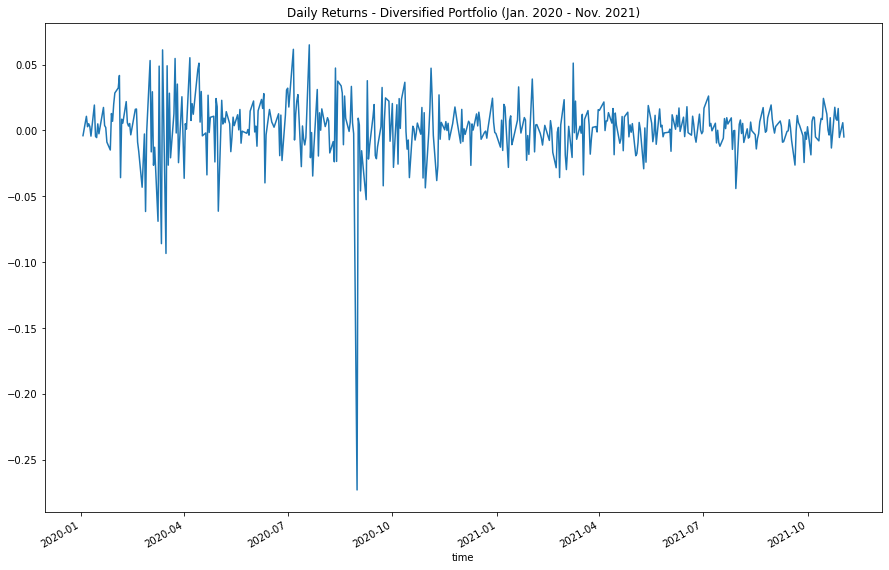

In [12]:
# Plot daily returns for the stocks portfolio
diversified_daily_returns_df.plot(figsize=(15,10), title="Daily Returns - Diversified Portfolio (Jan. 2020 - Nov. 2021)")

## Set Up and Run Monte Carlo Simulation for 10 Years

In [13]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment
MC_diversified_ten_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_diversified_ten_year.portfolio_data.head()

AAPL                                       \
                             open      high      low   close    volume   
time                                                                     
2020-01-02 00:00:00-05:00  296.24  300.6000  295.190  300.58  30589026   
2020-01-03 00:00:00-05:00  297.15  300.5800  296.500  297.38  31609363   
2020-01-06 00:00:00-05:00  293.79  299.9600  292.750  299.78  27487207   
2020-01-07 00:00:00-05:00  299.84  300.9000  297.480  298.27  24353387   
2020-01-08 00:00:00-05:00  297.16  304.4399  297.156  303.15  28984028   

                                           AMT                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-01-02 00:00:00-05:00          NaN  229.68  231.1499  228.0051  228.50   
2020-01-03 00:00:00-05:00    -0.010646  227.56  229.8300  227.0000  228.63   
2020-01-06 00:00:00-05:00     0.008070  228.48  230.0000  227.8922  228.51   
2020-01-07 00:00:00-05:00    -0.005037  227.13  227.5700  221.6200  223.68   
2020-01-08 00:00:00-05:00     0.016361  223.48  226.4850  222.7900  225.56   

                           ...       VOO                                \
                           ...       low   close   volume daily_return   
time                       ...                                           
2020-01-02 00:00:00-05:00  ...  296.3400  298.44  3098524          NaN   
2020-01-03 00:00:00-05:00  ...  295.0400  296.25  2956475    -0.007338   
2020-01-06 00:00:00-05:00  ...  294.3500  297.36  2645636     0.003747   
2020-01-07 00:00:00-05:00  ...  296.0611  296.52  1854570    -0.002825   
2020-01-08 00:00:00-05:00  ...  296.5000  298.06  3358222     0.005194   

                              VUG                                          \
                             open      high      low     close     volume   
time                                                                        
2020-01-02 00:00:00-05:00  183.57  184.7600  183.090  184.7600  1055649.0   
2020-01-03 00:00:00-05:00  182.50  184.4389  182.370  183.6100   903194.0   
2020-01-06 00:00:00-05:00  182.33  184.7800  182.170  184.7300   777690.0   
2020-01-07 00:00:00-05:00  184.69  185.2300  184.215  184.6035   911559.0   
2020-01-08 00:00:00-05:00  184.72  186.8500  184.540  186.0300   633410.0   

                                        
                          daily_return  
time                                    
2020-01-02 00:00:00-05:00          NaN  
2020-01-03 00:00:00-05:00    -0.006224  
2020-01-06 00:00:00-05:00     0.006100  
2020-01-07 00:00:00-05:00    -0.000685  
2020-01-08 00:00:00-05:00     0.007727  

[5 rows x 60 columns]

### Run the MC Simulation for 10 Years

In [14]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_diversified_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991348,1.002829,1.009933,0.999821,0.994336,1.000348,1.008546,0.993976,1.007479,1.003692,...,1.000390,1.004740,1.007698,1.017097,0.994634,0.999355,0.997359,0.991132,1.019939,0.992685
2,0.969146,1.008950,1.007952,1.006636,0.993951,0.993255,1.004204,0.991101,1.016461,1.002112,...,1.024568,1.004392,1.010576,1.015197,0.999306,1.012462,0.994494,1.011459,1.023087,1.003056
3,0.966944,0.999629,0.994166,0.994335,0.990987,0.997836,0.993134,1.006892,1.015822,1.007156,...,1.018996,1.011211,1.007139,1.004105,1.003314,1.013928,0.999303,0.997386,1.027946,1.004652
4,0.955929,0.998268,1.000126,0.995109,0.987686,0.992691,0.982189,1.006551,1.020194,1.013285,...,1.020541,1.039035,1.022693,0.993668,0.994387,1.025429,1.004426,0.994418,1.035329,1.020293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,25.493599,27.464973,35.331871,19.628201,25.798606,22.306337,37.940216,29.633791,13.554091,14.803235,...,41.834912,15.323201,15.936601,21.326634,22.879097,43.045147,25.810651,12.831106,17.091839,18.389531
2517,25.597070,26.998222,34.659689,19.653022,26.059075,22.035823,38.042080,29.338972,13.773644,14.752389,...,41.678071,15.251097,15.914149,21.435743,23.186622,42.318011,26.135356,12.830174,17.189900,18.556101
2518,25.614190,26.742228,34.891833,19.562753,25.999483,21.890733,38.005825,28.623162,13.818798,14.874425,...,41.985324,15.150730,15.845862,21.286604,23.036928,42.096347,26.099833,12.844999,17.380976,18.716096
2519,25.515289,26.485357,35.092728,19.712954,25.915291,21.923961,37.446516,28.663489,13.534565,14.710944,...,41.776293,15.309433,15.570899,21.355692,22.709622,42.624383,26.077199,12.808186,17.250744,18.781272


### Plot the MC 10 Year Simulation Visualization

<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

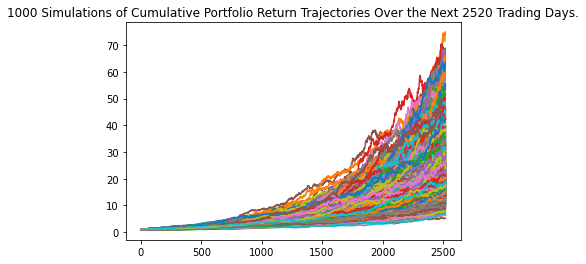

In [15]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot for the diversified portfolio
MC_diversified_ten_year.plot_simulation()

### Plot the MC 10 Year Simulation Distribution Visualization 

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

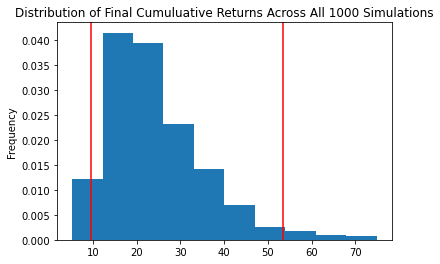

In [16]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_diversified_ten_year.plot_distribution()

### Generate MC 10 Year Simulation Summary Statistics

In [17]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_diversified_ten_year_summary_statistics = MC_diversified_ten_year.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
print(MC_diversified_ten_year_summary_statistics)

count           1000.000000
mean              24.570903
std               11.229838
min                5.209012
25%               16.323087
50%               22.369280
75%               30.596572
max               74.873189
95% CI Lower       9.602587
95% CI Upper      53.496617
Name: 2520, dtype: float64


### Calculate the Confidence Intervals to the 95% for the 10 year Simulation on a $10,000 initial investment

In [18]:
# Calculate the 10-year confidence interval lower and upper projections for a $10,000 initial investment
diversified_ten_year_lower_ci = round(MC_diversified_ten_year_summary_statistics[8]*10000, 2)
diversified_ten_year_upper_ci = round(MC_diversified_ten_year_summary_statistics[9]*10000, 2)

print(f"With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of ${diversified_ten_year_lower_ci} and ${diversified_ten_year_upper_ci}")

With a 95% confidence interval, an initial investment of $10,000 in our Stocks Portfolio for 5 years, will be in the range of $96025.87 and $534966.17


In [ ]:
# Set up Monte Carlo Simulation for a 10 year time period with a $10,000 initial investment in our Diversified Portfolio
MC_diversified_ten_year = MCSimulation(
  portfolio_data=diversified_prices_df,
  weights=[.1, .1, .1, .1, .1, .1, .1, .1, .1, .1],
  num_simulation=1000,
  num_trading_days=252 * 10
)

MC_diversified_ten_year.portfolio_data.head()

In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns for our Diversified Portfolio
MC_diversified_ten_year.calc_cumulative_return()